# Capital One Job Posting Analysis

Captial One has a reputation as a great place to work, the headquarters is three miles from my house, and is known for its widespread use of data analytcis throughout hte organization. There are always a lot of jobs posted, but without knowing the internal structure and divisions of the company, they are hard to assess given the titles alone.

## Web Scraping
Scraping job descrptions - First I read the terms and conditions of the website and also explored the robot.txt file. After confirming scraping the Capital One Career page was permissible, I searched for open jobs based on location (McLean, VA) and category in which I selected both “Analytics” and “Data Science.” This resulted in 108 jobs. I pulled the URLs into a CSV file.

I used Scrapy and a basic spider script to scrape the data. From each job posting, the program pulled the following items: url [job posting url], title [job title] , job_id  [job ID from posting], updated [date the post was updated], and text [job description text]. 

## Text Analysis


In [1093]:
import re,string
import json
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import pandas as pd
import os
import numpy as np

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

import multiprocessing

import re,string
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer,\
    CountVectorizer, HashingVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
import sklearn.linear_model 

# set working file
os.chdir('/Users/rachelmartonik/MSDS_453_NLP')

In [1094]:
#### Read in data ####
# Read in Job Data
import json
import pandas as pd
json_file='/Users/rachelmartonik/MSDS_453_NLP/JobPostSpider/items.jl'
jobs = pd.read_json(json_file, lines=True)

jobs.head()

,job_id,text,title,updated,url
0,"[Job ID, R90676]","Recruiting: VA - McLean, United States of Amer...",Data Scientist,"[Updated date, 01/17/2020]",https://www.capitalonecareers.com/job/mclean/d...
1,"[Job ID, R90624]","McLean 2 (19052), United States of America, Mc...","Data Scientist, Card DS+","[Updated date, 01/17/2020]",https://www.capitalonecareers.com/job/mclean/d...
2,"[Job ID, R90625]","McLean 2 (19052), United States of America, Mc...","Data Scientist, Small Business Card","[Updated date, 01/17/2020]",https://www.capitalonecareers.com/job/mclean/d...
3,"[Job ID, R90483]","77 West Wacker Dr (35012), United States of Am...","Senior Associate, Data Scientist, Card DS+","[Updated date, 01/16/2020]",https://www.capitalonecareers.com/job/chicago/...
4,"[Job ID, R90548]","McLean 2 (19052), United States of America, Mc...","Data Scientist, Digital Machine Learning","[Updated date, 01/16/2020]",https://www.capitalonecareers.com/job/mclean/d...


In [1095]:
print(jobs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
job_id     107 non-null object
text       107 non-null object
title      107 non-null object
updated    107 non-null object
url        107 non-null object
dtypes: object(5)
memory usage: 4.3+ KB
None


In [1096]:
# Get rid of job_id and updated lists
jobs = jobs.applymap(lambda x: x[1] if isinstance(x, list) else x)
jobs

,job_id,text,title,updated,url
0,R90676,"Recruiting: VA - McLean, United States of Amer...",Data Scientist,01/17/2020,https://www.capitalonecareers.com/job/mclean/d...
1,R90624,"McLean 2 (19052), United States of America, Mc...","Data Scientist, Card DS+",01/17/2020,https://www.capitalonecareers.com/job/mclean/d...
2,R90625,"McLean 2 (19052), United States of America, Mc...","Data Scientist, Small Business Card",01/17/2020,https://www.capitalonecareers.com/job/mclean/d...
3,R90483,"77 West Wacker Dr (35012), United States of Am...","Senior Associate, Data Scientist, Card DS+",01/16/2020,https://www.capitalonecareers.com/job/chicago/...
4,R90548,"McLean 2 (19052), United States of America, Mc...","Data Scientist, Digital Machine Learning",01/16/2020,https://www.capitalonecareers.com/job/mclean/d...
5,R90484,"West Creek 8 (12080), United States of America...","Manager, Data Scientist, Card DS+",01/16/2020,https://www.capitalonecareers.com/job/richmond...
6,R90472,"McLean 2 (19052), United States of America, Mc...","Principal Associate, Data Scientist - Small Bu...",01/16/2020,https://www.capitalonecareers.com/job/mclean/p...
7,R90486,"McLean 2 (19052), United States of America, Mc...","Senior Associate, Data Scientist, Card DS+",01/16/2020,https://www.capitalonecareers.com/job/mclean/s...
8,R90309,"McLean 1 (19050), United States of America, Mc...","Senior Analyst, Quantitative Analysis -Trade A...",01/15/2020,https://www.capitalonecareers.com/job/mclean/s...
9,R90390,"Recruiting: VA - McLean, United States of Amer...","Senior Manager, Data Science Tech College",01/14/2020,https://www.capitalonecareers.com/job/mclean/s...


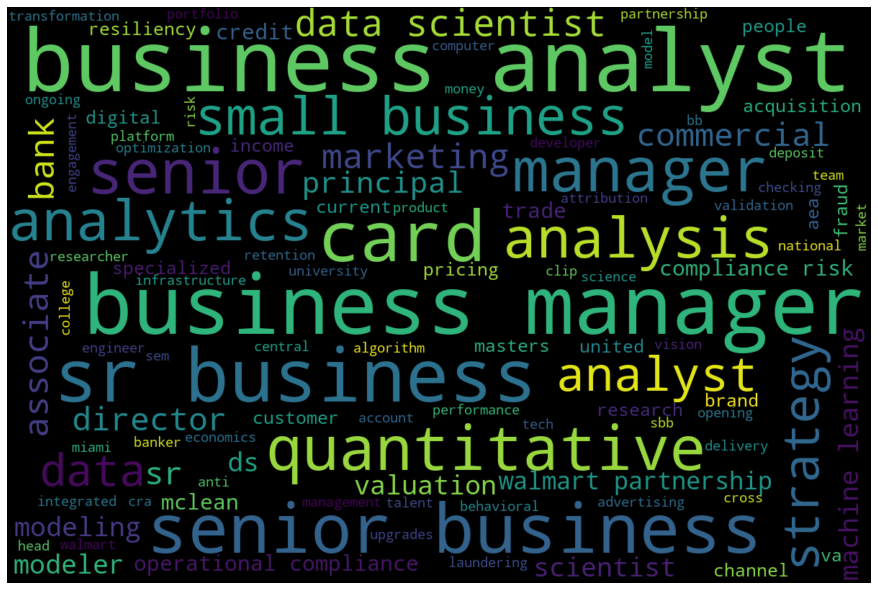

In [1097]:
#### Word cloud of job titles ####
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
comment_words = ' '
stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in jobs.title: 
     
   # typecaste each val to string 
   val = str(val) 
 
   # split the value 
   tokens = val.split() 
     
   # Converts each token into lowercase 
   for i in range(len(tokens)): 
       tokens[i] = tokens[i].lower() 
         
   for words in tokens: 
       comment_words = comment_words + words + ' '
 
 
wordcloud = WordCloud(width = 1200, height = 800, 
               background_color ='black', 
               stopwords = stopwords, 
               min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('job title word cloud.png')
plt.show() 


In [1098]:
data = jobs
#print to show the first and last 10 documents
print('\nGlimpse of beginning of corpus data frame:\n')
print(data.head(10))


Glimpse of beginning of corpus data frame:

    job_id                                               text  \
0   R90676  Recruiting: VA - McLean, United States of Amer...   
1   R90624  McLean 2 (19052), United States of America, Mc...   
2   R90625  McLean 2 (19052), United States of America, Mc...   
3   R90483  77 West Wacker Dr (35012), United States of Am...   
4   R90548  McLean 2 (19052), United States of America, Mc...   
5   R90484  West Creek 8 (12080), United States of America...   
6   R90472  McLean 2 (19052), United States of America, Mc...   
7   R90486  McLean 2 (19052), United States of America, Mc...   
8   R90309  McLean 1 (19050), United States of America, Mc...   
9   R90390  Recruiting: VA - McLean, United States of Amer...   

                                               title      updated  \
0                                     Data Scientist   01/17/2020   
1                           Data Scientist, Card DS+   01/17/2020   
2                Data Scientist,

In [1099]:
print(data['text'][0])

Recruiting: VA - McLean, United States of America, McLean, VirginiaAt Capital One, we’re building a leading information-based technology company. Still founder-led by Chairman and Chief Executive Officer Richard Fairbank, Capital One is on a mission to help our customers succeed by bringing ingenuity, simplicity, and humanity to banking. We measure our efforts by the success our customers enjoy and the advocacy they exhibit. We are succeeding because they are succeeding.                                               Guided by our shared values, we thrive in an environment where collaboration and openness are valued. We believe that innovation is powered by perspective and that teamwork and respect for each other lead to superior results. We elevate each other and obsess about doing the right thing. Our associates serve with humility and a deep respect for their responsibility in helping our customers achieve their goals and realize their dreams. Together, we are on a quest to change ba

In [1100]:
data['text']

0      Recruiting: VA - McLean, United States of Amer...
1      McLean 2 (19052), United States of America, Mc...
2      McLean 2 (19052), United States of America, Mc...
3      77 West Wacker Dr (35012), United States of Am...
4      McLean 2 (19052), United States of America, Mc...
5      West Creek 8 (12080), United States of America...
6      McLean 2 (19052), United States of America, Mc...
7      McLean 2 (19052), United States of America, Mc...
8      McLean 1 (19050), United States of America, Mc...
9      Recruiting: VA - McLean, United States of Amer...
10     McLean 2 (19052), United States of America, Mc...
11     West Creek 1 (12071), United States of America...
12     McLean 2 (19052), United States of America, Mc...
13     McLean 2 (19052), United States of America, Mc...
14     McLean 2 (19052), United States of America, Mc...
15     McLean 1 (19050), United States of America, Mc...
16     McLean 2 (19052), United States of America, Mc...
17     Recruiting: VA - Richmon

In [1101]:
#create empty list to store text documents
text_body=[]

#for loop which appends the text to the text_body list
for i in range(0,len(data)):
    temp_text=data['text'].iloc[i]
    text_body.append(temp_text)

In [1102]:
text_body[0]

"Recruiting: VA - McLean, United States of America, McLean, VirginiaAt Capital One, we’re building a leading information-based technology company. Still founder-led by Chairman and Chief Executive Officer Richard Fairbank, Capital One is on a mission to help our customers succeed by bringing ingenuity, simplicity, and humanity to banking. We measure our efforts by the success our customers enjoy and the advocacy they exhibit. We are succeeding because they are succeeding.\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Guided by our shared values, we thrive in an environment where collaboration and openness are valued. We believe that innovation is powered by perspective and that teamwork and respect for each other lead to superior results. We elevate each other and obsess about doing the right thing. Our associates serve with humility and a deep re

In [1103]:
#### Remove generic Cap 1 description and Equal Opportunity Employer
shortened_text1=[]
for i in text_body:
    text= i.rsplit('Capital One will consider',)[0]
    shortened_text1.append(text)

print(shortened_text1)

['Recruiting: VA - McLean, United States of America, McLean, VirginiaAt Capital One, we’re building a leading information-based technology company. Still founder-led by Chairman and Chief Executive Officer Richard Fairbank, Capital One is on a mission to help our customers succeed by bringing ingenuity, simplicity, and humanity to banking. We measure our efforts by the success our customers enjoy and the advocacy they exhibit. We are succeeding because they are succeeding.\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Guided by our shared values, we thrive in an environment where collaboration and openness are valued. We believe that innovation is powered by perspective and that teamwork and respect for each other lead to superior results. We elevate each other and obsess about doing the right thing. Our associates serve with humility and a deep r

In [1104]:
# Cut off the first Cap 1 paragraph
shortened_text=[]
for i in shortened_text1:
    text= i.rsplit('financial lives.', )[-1]
    shortened_text.append(text)
    
print(shortened_text[0])

Role DescriptionIn this role, you will:Partner with a cross-functional team of data scientists, software engineers, and product managers to deliver a product customers loveLeverage a broad stack of technologies — Python, Conda, AWS, H2O, Spark, and more — to reveal the insights hidden within huge volumes of numeric and textual dataBuild machine learning models through all phases of development, from design through training, evaluation, validation, and implementationFlex your interpersonal skills to translate the complexity of your work into tangible business goalsThe Ideal Candidate is:Customer first. You love the process of analyzing and creating, but also share our passion to do the right thing. You know at the end of the day it’s about making the right decision for our customers.Innovative. You continually research and evaluate emerging technologies. You stay current on published state-of-the-art methods, technologies, and applications and seek out opportunities to apply them.Creati

# Cleaning the documents

In [1105]:
# Settings for vectorization
STEMMING = False  # judgment call, parsed documents more readable if False
MAX_NGRAM_LENGTH = 2  # Experiment with n-gram length
VECTOR_LENGTH = 20000  # set vector length for TF-IDF and Doc2Vec

In [1106]:
from nltk.corpus import stopwords

# Function to clean documents
def clean_doc(doc): 
    # split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # Change numbers to words to incorporate years experience
    re_word = re.compile(r'1')
    tokens = [re_word.sub('one', w) for w in tokens]
    re_word = re.compile(r'2')
    tokens = [re_word.sub('two', w) for w in tokens]
    re_word = re.compile(r'3')
    tokens = [re_word.sub('three', w) for w in tokens]
    re_word = re.compile(r'4')
    tokens = [re_word.sub('four', w) for w in tokens]
    re_word = re.compile(r'5')
    tokens = [re_word.sub('five', w) for w in tokens]
    re_word = re.compile(r'6')
    tokens = [re_word.sub('six', w) for w in tokens]
    re_word = re.compile(r'7')
    tokens = [re_word.sub('seven', w) for w in tokens]
    re_word = re.compile(r'8')
    tokens = [re_word.sub('eight', w) for w in tokens]
    re_word = re.compile(r'9')
    tokens = [re_word.sub('nine', w) for w in tokens]
    re_word = re.compile(r'10')
    tokens = [re_word.sub('ten', w) for w in tokens]
    re_word = re.compile(r'1+')
    tokens = [re_word.sub('one plus', w) for w in tokens]
    re_word = re.compile(r'2+')
    tokens = [re_word.sub('two plus', w) for w in tokens]
    re_word = re.compile(r'3+')
    tokens = [re_word.sub('three plus', w) for w in tokens]
    re_word = re.compile(r'4+')
    tokens = [re_word.sub('four plus', w) for w in tokens]
    re_word = re.compile(r'5+')
    tokens = [re_word.sub('five plus', w) for w in tokens]
    re_word = re.compile(r'6+')
    tokens = [re_word.sub('six plus', w) for w in tokens]
    re_word = re.compile(r'7+')
    tokens = [re_word.sub('seven plus', w) for w in tokens]
    re_word = re.compile(r'8+')
    tokens = [re_word.sub('eight plus', w) for w in tokens]
    re_word = re.compile(r'9+')
    tokens = [re_word.sub('nine plus', w) for w in tokens]
    re_word = re.compile(r'10+')
    tokens = [re_word.sub('ten plus', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # # filter out short tokens
    #tokens = [word for word in tokens if len(word) > 1]
    # #lowercase all words
    tokens = [word.lower() for word in tokens]
    # Manually clean equivalent classes
    re_word = re.compile(r'opensource')
    tokens = [re_word.sub('open source', w) for w in tokens]
    re_word = re.compile(r'beyondtechnical')
    tokens = [re_word.sub('beyond technical', w) for w in tokens]
    re_word = re.compile(r'sciencebasic')
    tokens = [re_word.sub('science basic', w) for w in tokens]
    re_word = re.compile(r'analysisat')
    tokens = [re_word.sub('analysis at', w) for w in tokens]
    re_word = re.compile(r'databasespreferred')
    tokens = [re_word.sub('databases preferred', w) for w in tokens]
    re_word = re.compile(r'descriptionsmall')
    tokens = [re_word.sub('description small', w) for w in tokens]
    re_word = re.compile(r'businessgrade')
    tokens = [re_word.sub('business grade', w) for w in tokens]
    re_word = re.compile(r'customerfirst')
    tokens = [re_word.sub('customer first', w) for w in tokens]
    re_word = re.compile(r'descriptionin')
    tokens = [re_word.sub('description in', w) for w in tokens]
    re_word = re.compile(r'willpartner')
    tokens = [re_word.sub('will partner', w) for w in tokens]
    re_word = re.compile(r'loveleverage')
    tokens = [re_word.sub('love leverage', w) for w in tokens]
    re_word = re.compile(r'stateoftheart')
    tokens = [re_word.sub('state of the art', w) for w in tokens]
    re_word = re.compile(r'stepchange')
    tokens = [re_word.sub('step change', w) for w in tokens]
    re_word = re.compile(r'lead')
    tokens = [re_word.sub('drive', w) for w in tokens]
    # # filter out stop words
    stop_words = list(stopwords.words('english'))
    stop_words.append('capital')
    #stop_words.append('one')
    stop_words.append('captial one')
    stop_words.append('mclean')
    stop_words.append('heshe')
                      
    tokens = [w for w in tokens if not w in stop_words]         
    # # word stemming Commented
    if STEMMING:
        ps=PorterStemmer()
        tokens=[ps.stem(word) for word in tokens]
    return tokens



In [1107]:
# Create empty list to store text documents labels (job titles)
labels=[]

#Append job titles to label list
for i in range(0,len(data)):
    temp_text=data['title'].iloc[i]
    labels.append(temp_text)

# # Append job titles to label list
# for i in range(0,len(data)):
#     temp_text=data['job_id'].iloc[i]
#     labels.append(temp_text)   
    
    
# Create empty list to store processed documents
processed_text=[]

# Process documents
for i in shortened_text:
    text=clean_doc(i)
    processed_text.append(text)
    
processed_text

[['role',
  'description in',
  'role',
  'will partner',
  'crossfunctional',
  'team',
  'data',
  'scientists',
  'software',
  'engineers',
  'product',
  'managers',
  'deliver',
  'product',
  'customers',
  'love leverage',
  'broad',
  'stack',
  'technologies',
  'python',
  'conda',
  'aws',
  'htwoo',
  'spark',
  'reveal',
  'insights',
  'hidden',
  'within',
  'huge',
  'volumes',
  'numeric',
  'textual',
  'databuild',
  'machine',
  'learning',
  'models',
  'phases',
  'development',
  'design',
  'training',
  'evaluation',
  'validation',
  'implementationflex',
  'interpersonal',
  'skills',
  'translate',
  'complexity',
  'work',
  'tangible',
  'business',
  'goalsthe',
  'ideal',
  'candidate',
  'iscustomer',
  'first',
  'love',
  'process',
  'analyzing',
  'creating',
  'also',
  'share',
  'passion',
  'right',
  'thing',
  'know',
  'end',
  'day',
  'making',
  'right',
  'decision',
  'customersinnovative',
  'continually',
  'research',
  'evaluate',
 

In [1108]:
# Combine for final processed text list
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)
    
type(final_processed_text)
#the following is an example of what the processed text looks like.  
print('\nExample of what one parsed document looks like:\n')
print(final_processed_text[4])


Example of what one parsed document looks like:

team descriptiondigital ml data science machine learning team inside digital products organization deliver realtime personalized intelligent customer experiences suite awardwinning digital products including website mobile app emails chatbot beyond partner closely product engineering teams build data modeling platforms crucial deep understanding customers enables applications delight adapting needsas part digital ml willexplore billions clickstream events discover patterns customer behavior use patterns model key customer outcomesbuild leverage enterprisewide taxonomy customer data optimize digital marketing initiativesdevelop realtime models use vast amounts customer data anticipate needs deliver right message right timedevelop models ensure important customer data accurate fighting fraud bad behavior enabling seamless digital experiences across productsrole description in digital ml work phases data science life cycle includingbuild m

# Classification
For this assignment I need some way of comparing the three type of vectorizations (manual analyst judgement, TF-IDF, and NN word embeddings). The Capital One job descriptions do not have any natural classifications and this is one of the issues with the job postings--it is hard to decipher what department or at what level many of the jobs are.

I reviewed each job description and created the following three variables that could be used for classificaiton:

1) __level__ - "junior", "mid", and "senior" based on my assessment of the job duties and experiences required (both basic and preferred qualifications.) Admittedly, this is a subjective rating. However, I generally followed the following guidelines:

    junior= bach degree, 1-2 years experience

    Mid= masters degree (or bach with more experience), 2-3/4 years depending on description

    Senior= pHD, 3+ years

2) __interested__ - whether or not I am intersted in the job (mainly based off of actual job duties and content area, not level or if I was/was not qualified)

3) __department__ - if a specific department (i.e. Small Business Bank) was listed. Otherwise coded as "generic"


In [974]:
# # Classification - The job descriptions are not labeled. I need to label them. Export file to add classifications.
# jobs.to_csv('/Users/rachelmartonik/MSDS_453_NLP/jobs2.csv', index=True)

In [1044]:
import pandas as pd
jobs2 = pd.read_excel('jobs_wTarget.xlsm')
jobs2.head()

,Index,job_id,level,department,interested
0,0,R90676,mid,generic,yes
1,1,R90624,junior,Card DS+,yes
2,2,R90625,junior,Small Business Card,yes
3,3,R90483,junior,Card DS+,yes
4,4,R90548,senior,Digital ML,yes


In [1045]:
#Combine imported file with targets to existing jobs dataframe
jobs_targets = pd.concat([jobs2,jobs], axis = 1)
jobs_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
Index         107 non-null int64
job_id        107 non-null object
level         107 non-null object
department    107 non-null object
interested    107 non-null object
job_id        107 non-null object
text          107 non-null object
title         107 non-null object
updated       107 non-null object
url           107 non-null object
dtypes: int64(1), object(9)
memory usage: 8.4+ KB


In [1046]:
jobs_targets.head()

,Index,job_id,level,department,interested,job_id,text,title,updated,url
0,0,R90676,mid,generic,yes,R90676,"Recruiting: VA - McLean, United States of Amer...",Data Scientist,01/17/2020,https://www.capitalonecareers.com/job/mclean/d...
1,1,R90624,junior,Card DS+,yes,R90624,"McLean 2 (19052), United States of America, Mc...","Data Scientist, Card DS+",01/17/2020,https://www.capitalonecareers.com/job/mclean/d...
2,2,R90625,junior,Small Business Card,yes,R90625,"McLean 2 (19052), United States of America, Mc...","Data Scientist, Small Business Card",01/17/2020,https://www.capitalonecareers.com/job/mclean/d...
3,3,R90483,junior,Card DS+,yes,R90483,"77 West Wacker Dr (35012), United States of Am...","Senior Associate, Data Scientist, Card DS+",01/16/2020,https://www.capitalonecareers.com/job/chicago/...
4,4,R90548,senior,Digital ML,yes,R90548,"McLean 2 (19052), United States of America, Mc...","Data Scientist, Digital Machine Learning",01/16/2020,https://www.capitalonecareers.com/job/mclean/d...


In [1047]:
# Add numeric target for classification
from sklearn.preprocessing import LabelEncoder
jobs_targets["level_target"] = LabelEncoder().fit_transform(jobs_targets.level)
jobs_targets["interested_target"] = LabelEncoder().fit_transform(jobs_targets.interested)
jobs_targets["department_target"] = LabelEncoder().fit_transform(jobs_targets.department)
print(jobs_targets["level_target"].value_counts())
print(jobs_targets["interested_target"].value_counts())
#print(jobs_targets["department_target"].value_counts())

1    42
0    40
2    25
Name: level_target, dtype: int64
0    77
1    30
Name: interested_target, dtype: int64


# Prepare Test and Training Data Set

In [866]:
data_level = jobs_targets[['level_target','text']]
data_interested = jobs_targets[['interested_target','text']]
data_departnment = jobs_targets[['department_target','text']]

In [867]:
# # Change data set here depending on what you are testing
# # LEVEL OF POSITION
# data = data_level
# # Prepare Train Data
# from sklearn.model_selection import train_test_split
# #Split data into training and test data sets
# X_train, X_test, y_train, y_test = train_test_split(data.drop('level_target', axis = 1), 
#                                                     data['level_target'])
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

In [872]:
# Change data set here depending on what you are testing
# INTERESTED
data = data_interested
# Prepare Train Data
from sklearn.model_selection import train_test_split
#Split data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('interested_target', axis = 1), 
                                                    data['interested_target'])
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

80
27
80
27


In [873]:
y_test

37     1
83     0
89     0
31     0
64     0
8      0
5      1
98     0
4      1
106    1
41     0
86     0
21     0
2      1
3      1
103    0
78     0
72     0
92     0
93     0
84     0
90     0
100    0
35     0
1      1
62     0
57     0
Name: interested_target, dtype: int64

# Approach 1: Analyst Judgment.

As we have reviewed in classroom discussions, initial work with document collections could begin with identifying important terms or equivalence classes (ECs) to be included in a corpus-wide Reference Term Vector (RTV). One way to do this is to employ analyst judgment guided by corpus statistics. 

To decide on whether or not we will keep a term in a small document collection, for example, we need to know that: (1) It is important in at least one document, and (2) It is prevalent in more than one document.

For larger document collections, we may specify percentages of documents in which we observe the terms or ECs. Analyst judgment is critical to this approach.

After the important terms have been identified, we can assign a number (perhaps a count or proportion) for each term in each document. That is, we can define a vector of numbers for each document.

# Build a Vocabulary

In [1048]:
from nltk.collections import Counter
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
tokenized_sents = [tokenizer.tokenize(i) for i in final_processed_text]
#for i in tokenized_sents:
    #print (i)

In [1049]:
# Create a vocabulary document
import functools 
from functools import reduce
tokenized_sents = reduce(lambda x, y: x + y, tokenized_sents, [])

vocab = Counter(tokenized_sents)
print(len(vocab))
vocab.most_common()

2821


[('business', 900),
 ('experience', 789),
 ('one', 713),
 ('drive', 552),
 ('years', 431),
 ('skills', 365),
 ('customers', 332),
 ('strategic', 309),
 ('data', 306),
 ('new', 298),
 ('credit', 297),
 ('environment', 282),
 ('analysis', 278),
 ('develop', 274),
 ('risk', 258),
 ('least', 257),
 ('team', 245),
 ('product', 234),
 ('quantitative', 231),
 ('two', 228),
 ('marketing', 223),
 ('technology', 210),
 ('banking', 206),
 ('products', 202),
 ('succeeding', 200),
 ('respect', 200),
 ('strategies', 200),
 ('results', 199),
 ('orientation', 195),
 ('company', 192),
 ('management', 185),
 ('strong', 182),
 ('efforts', 178),
 ('analytics', 172),
 ('build', 172),
 ('values', 167),
 ('degree', 165),
 ('goals', 164),
 ('driveership', 161),
 ('responsibility', 160),
 ('able', 160),
 ('innovation', 159),
 ('across', 155),
 ('success', 155),
 ('change', 154),
 ('associates', 145),
 ('communication', 145),
 ('year', 144),
 ('help', 142),
 ('finance', 142),
 ('work', 140),
 ('decision', 138),

In [1050]:
# # create list of words only from vocab list
# vocab_list = []
# for word in tokenized_sents:
#     vocab_list.append(word)
    
# print(len(vocab))
# print(len(vocab_list)) # the list is not deduped

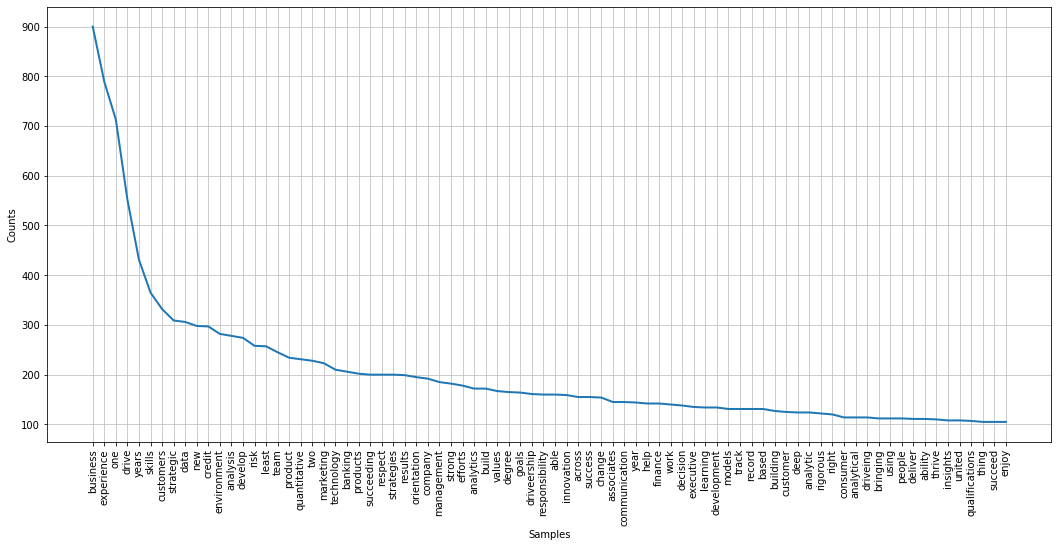

In [1051]:
# Histogram of vocabulary and save file for future use
# Save as a FreqDist object native to nltk.
corpus_freq_dist = nltk.FreqDist(vocab)
corpus_freq_dist
# Plot distribution for the entire corpus.
plt.figure(figsize = (18, 8)) 
a = corpus_freq_dist.plot(80)




# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text 
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
# save tokens to a vocabulary file
save_list(vocab, 'vocab.txt')


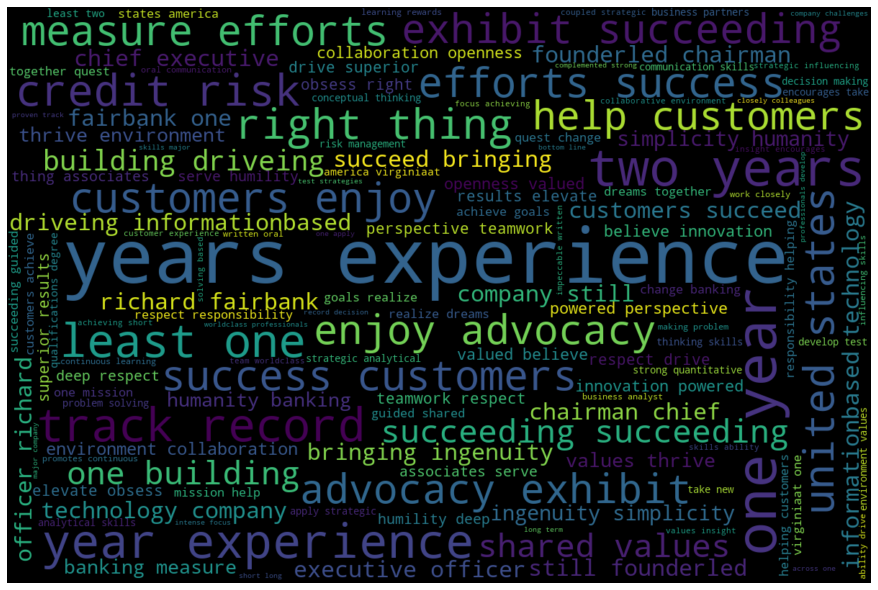

In [1052]:
#### Word cloud of job titles ####
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
comment_words = ' '
stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in final_processed_text: 
     
   # typecaste each val to string 
   val = str(val) 
 
   # split the value 
   tokens = val.split() 
     
   # Converts each token into lowercase 
   for i in range(len(tokens)): 
       tokens[i] = tokens[i].lower() 
         
   for words in tokens: 
       comment_words = comment_words + words + ' '
 
 
wordcloud = WordCloud(width = 1200, height = 800, 
               background_color ='black', 
               stopwords = stopwords, 
               min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('job title word cloud.png')
plt.show() 

# Vocabulary for Model

In [1109]:
### Count Vectorization
# Use CountVectorizer to get a count of the number of times each word appears in a document
MAX_NGRAM_LENGTH = 1
VECTOR_LENGTH=len(vocab)
count_vectorizer = CountVectorizer(ngram_range = (1, MAX_NGRAM_LENGTH), max_features = VECTOR_LENGTH)
count_vectors = count_vectorizer.fit_transform(final_processed_text)

count_vect_df = pd.DataFrame(count_vectors.todense(), columns=count_vectorizer.get_feature_names())
count_vect_df.head()

,ab,abcs,abilities,ability,able,abreast,academic,accelerate,access,accompanying,...,years,yet,york,yorkat,youbring,youll,young,youspecific,youwill,youyou
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


In [1110]:
# Count number of documents contain a specific word
seriesObj = count_vect_df.apply(lambda x: True if x['one'] > 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
 
print(numOfRows)

# Count total number of times word appears in all documents
print(count_vect_df['one'].sum())

107
713


In [1111]:
# Function to count the number of times each word appears in docu
def number_docs(data):
    total = []
    names = []
    percent = []
    for column in data:
        seriesObj = data.apply(lambda x: True if x[column] > 0 else False , axis=1)
        numOfRows = len(seriesObj[seriesObj == True].index)
        total.append(numOfRows)
        names.append(column)
        per = numOfRows/107
        percent.append(per)
        percentile_list = pd.DataFrame(
            {'Term': names,
             'NumofDocs': total,
             'Percent': percent
             })
    return percentile_list

In [1112]:
# create dataframe with results
df = number_docs(count_vect_df)
len(df)

2817

In [1113]:
# See results
df.sort_values(by=['Percent'], ascending=False)      

,Term,NumofDocs,Percent
956,experience,107,1.000000
1707,one,107,1.000000
658,deep,106,0.990654
610,customers,106,0.990654
2544,technology,105,0.981308
2197,right,105,0.981308
1422,least,104,0.971963
344,business,104,0.971963
331,bringing,103,0.962617
2580,thrive,103,0.962617


In [994]:
# Get vocab into data frame to merge with counts by doc dataframe
vocab_df = pd.DataFrame.from_dict(vocab, orient='index').reset_index()
vocab_df.columns = ['Term', 'word_freq_corpus']
print(len(vocab_df))

# Frequency df to combine total word frequencies and frequency in which word appears in a doc
frequency_df = vocab_df.merge(df, on='Term')
frequency_df.sort_values(by=['word_freq_corpus'], ascending=False)

2821


,Term,word_freq_corpus,NumofDocs,Percent
50,business,900,104,0.971963
121,experience,789,107,1.000000
165,one,713,107,1.000000
295,drive,552,100,0.934579
161,years,431,102,0.953271
45,skills,365,97,0.906542
14,customers,332,106,0.990654
240,strategic,309,74,0.691589
7,data,306,65,0.607477
100,new,298,88,0.822430


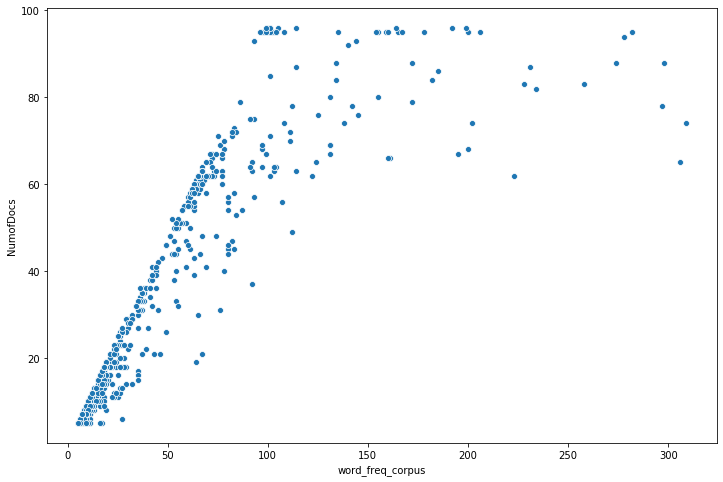

In [1011]:
#Scatterplot of NumberofDocs (number of documents word appears in) by total word frequency
plt.figure(figsize = (12, 8), facecolor = None) 
ax = sns.scatterplot(x="word_freq_corpus", y="NumofDocs", data=frequency_df)
fig = ax.get_figure()
#fig.savefig("scatter.png")
# Should I get rid of Business, experience, and one?

In [995]:
# # Vector #2
# frequency_df = frequency_df[frequency_df['NumofDocs'] >= 4 ] # Remove words that appear less than 4x accross all docs
# frequency_df = frequency_df[frequency_df['Percent'] <= .95 ] # Remove words in more than 95% of documents
# print(len(frequency_df))
# frequency_df.sort_values(by=['word_freq_corpus'], ascending=False)

In [ ]:
# # Vector #3
# frequency_df = frequency_df[frequency_df['NumofDocs'] >= 5 ] # Remove words that appear less than 5x accross all docs
# frequency_df = frequency_df[frequency_df['Percent'] <= .90 ] # Remove words in more than 90% of documents
# print(len(frequency_df))
# frequency_df.sort_values(by=['word_freq_corpus'], ascending=False)

In [1059]:
# # Vector #4
# frequency_df = frequency_df[frequency_df['Percent'] <= .70 ] # Remove words in more than 90% of documents
# print(len(frequency_df))
# frequency_df.sort_values(by=['word_freq_corpus'], ascending=False)

763


,Term,word_freq_corpus,NumofDocs,Percent
240,strategic,309,74,0.691589
7,data,306,65,0.607477
335,marketing,223,62,0.579439
294,products,202,74,0.691589
617,strategies,200,68,0.635514
700,orientation,195,67,0.626168
712,driveership,161,66,0.616822
716,able,160,66,0.616822
68,decision,138,74,0.691589
705,based,131,67,0.626168


In [1060]:
# Create vocab list for Analyst Judgement Classification below
vocab_model =pd.DataFrame(frequency_df['Term'])
vocab_model

,Term
0,role
1,description
2,in
3,will
4,partner
5,crossfunctional
7,data
8,scientists
9,software
10,engineers


In [1061]:
# Add n-grams manually
listOfSeries = [pd.Series(['bottom line'], index=vocab_model.columns ) ,
                pd.Series(['years experience'], index=vocab_model.columns ) ,
                pd.Series(['open source'], index=vocab_model.columns ),
                pd.Series(['new idea'], index=vocab_model.columns ),
                pd.Series(['machine learning'], index=vocab_model.columns ),
                pd.Series(['predictive models'], index=vocab_model.columns ),
                pd.Series(['large scale'], index=vocab_model.columns ),
                pd.Series(['ideal candidate'], index=vocab_model.columns ),
                pd.Series(['right thing'], index=vocab_model.columns ),
                pd.Series(['emerging technologies'], index=vocab_model.columns ),
                pd.Series(['hands on'], index=vocab_model.columns ),
                pd.Series(['open source'], index=vocab_model.columns ),
                pd.Series(['cloud computing'], index=vocab_model.columns ),
                pd.Series(['time series'], index=vocab_model.columns ),
                pd.Series(['confusion matrix'], index=vocab_model.columns ),
                pd.Series(['roc curve'], index=vocab_model.columns ),
                pd.Series(['sentiment analysis'], index=vocab_model.columns ),
                ]

# Pass a list of series to the append() to add multiple rows
vocab_model = vocab_model.append(listOfSeries , ignore_index=True)
vocab_model.tail()
len(vocab_model)

780

# Classification

In [1062]:
from nltk.corpus import stopwords
# Prepare Train Data
train_tokens = []  # list of token lists for gensim Doc2Vec
train_text = [] # list of document strings for sklearn TF-IDF

#create empty list to store text documents
data = X_train
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
train_text = final_processed_text   
train_tokens = processed_text
print(len(train_text))
print(len(train_tokens))

80
80


In [1063]:
# Prepare Train Data
test_tokens = []  # list of token lists for gensim Doc2Vec
test_text = [] # list of document strings for sklearn TF-IDF

#create empty list to store text documents
data = X_test
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
test_text = final_processed_text   
test_tokens = processed_text
print(len(test_text))
print(len(test_tokens))

27
27


In [1064]:
### Count Vectorization
count_vectorizer = CountVectorizer(ngram_range = (1, MAX_NGRAM_LENGTH), vocabulary=vocab_model)
count_vectors = count_vectorizer.fit_transform(train_text)
print('\ncount vectorization. . .')
print('\nTraining count_vectors_training.shape:', count_vectors.shape)

# Apply the same vectorizer to the test data
# Notice how we use count_vectorizer.transform, NOT count_vectorizer.fit_transform
count_vectors_test = count_vectorizer.transform(test_text)
print('\nTest count_vectors_test.shape:', count_vectors_test.shape)


count vectorization. . .

Training count_vectors_training.shape: (80, 1)

Test count_vectors_test.shape: (27, 1)


In [1077]:
SET_RANDOM=999
count_clf = RandomForestClassifier(max_depth = 2, n_estimators = 500, random_state = SET_RANDOM)
count_clf.fit(count_vectors, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [1078]:
count_pred = count_clf.predict(count_vectors_test)  # evaluate on test set
print('\nCount/Random forest F1 classification performance in test set:',
    round(metrics.f1_score(y_test, count_pred, average='macro'), 3))


Count/Random forest F1 classification performance in test set: 0.426


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1079]:
print(accuracy_score(y_test, count_pred))

0.7407407407407407


In [1080]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, count_pred)

array([[20,  0],
       [ 7,  0]])

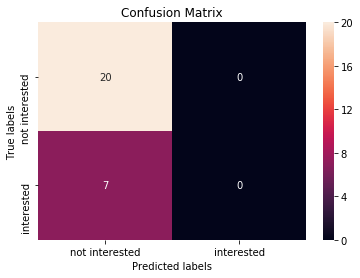

In [1069]:
import seaborn as sns
import matplotlib.pyplot as plt   
cm = confusion_matrix(y_test, count_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not interested', 'interested']); ax.yaxis.set_ticklabels(['not interested', 'interested']);

# TF-IDF Vectorization

In [1114]:
# Basic cleans for TF-IDF
from nltk.corpus import stopwords

# Function to clean documents
def clean_doc(doc): 
    # split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    # # filter out short tokens
    #tokens = [word for word in tokens if len(word) > 1]
    # #lowercase all words
    tokens = [word.lower() for word in tokens]                    
    tokens = [w for w in tokens if not w in stop_words]         
    # # word stemming Commented
    if STEMMING:
        ps=PorterStemmer()
        tokens=[ps.stem(word) for word in tokens]
    return tokens

In [1115]:
# TF-IDF EXPLORATION
# Prepare Entire Data Set for TF-IDF exploration
data = data_level
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
train_text = final_processed_text   
train_tokens = processed_text
print(len(train_text))
print(len(train_tokens))

107
107


In [1116]:
### Sklearn TFIDF 
VECTOR_LENGTH = 1000
MAX_NGRAM_LENGTH = 2

# Note the ngram_range will allow you to include multiple-word tokens within the TFIDF matrix
Tfidf=TfidfVectorizer(ngram_range = (1, MAX_NGRAM_LENGTH), max_features = VECTOR_LENGTH)
TFIDF_matrix=Tfidf.fit_transform(final_processed_text)     

#creating datafram from TFIDF Matrix
matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns = Tfidf.get_feature_names(), index=labels)
matrix


,ability,ability build,ability drive,able,able bring,able consistently,able drive,accommodation,accommodation please,accommodationsfor,...,year,year experience,years,years experience,yet,yet responsible,york,york correction,york fair,youll
Data Scientist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020669,0.020669,0.020669,...,0.070615,0.072626,0.043297,0.022260,0.000000,0.000000,0.041338,0.020669,0.020669,0.000000
"Data Scientist, Card DS+",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018562,0.018562,0.018562,...,0.063418,0.065225,0.038884,0.019991,0.000000,0.000000,0.037125,0.018562,0.018562,0.000000
"Data Scientist, Small Business Card",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018877,0.018877,0.018877,...,0.107491,0.066331,0.059317,0.020330,0.000000,0.000000,0.037755,0.018877,0.018877,0.000000
"Senior Associate, Data Scientist, Card DS+",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016945,0.016945,0.016945,...,0.057892,0.059541,0.035496,0.018249,0.000000,0.000000,0.033889,0.016945,0.016945,0.000000
"Data Scientist, Digital Machine Learning",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017484,0.017484,0.017484,...,0.079647,0.081915,0.073252,0.037660,0.000000,0.000000,0.034969,0.017484,0.017484,0.000000
"Manager, Data Scientist, Card DS+",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016235,0.016235,0.016235,...,0.036979,0.038032,0.068020,0.052455,0.000000,0.000000,0.032471,0.016235,0.016235,0.000000
"Principal Associate, Data Scientist - Small Business Card, Behavioral Modeling",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018034,0.018034,0.018034,...,0.123224,0.084489,0.094442,0.038843,0.000000,0.000000,0.036067,0.018034,0.018034,0.000000
"Senior Associate, Data Scientist, Card DS+",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017209,0.017209,0.017209,...,0.058794,0.060468,0.036049,0.018533,0.000000,0.000000,0.034417,0.017209,0.017209,0.000000
"Senior Analyst, Quantitative Analysis -Trade Analytics and Valuation",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024873,0.024873,0.024873,...,0.028327,0.029133,0.000000,0.000000,0.000000,0.000000,0.049747,0.024873,0.024873,0.000000
"Senior Manager, Data Science Tech College",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016008,0.016008,0.016008,...,0.036460,0.037498,0.083832,0.068958,0.000000,0.000000,0.032015,0.016008,0.016008,0.000000


In [1117]:
# Explore TFIDF Values - set average value and identify outliers
average_TFIDF={}
for i in matrix.columns:
    average_TFIDF[i]=np.mean(matrix[i])

average_TFIDF_DF = pd.DataFrame(average_TFIDF,index = [0]).transpose()

average_TFIDF_DF.columns=['TFIDF']

# sort by highest average TF-IDF score
average_TFIDF_DF.sort_values(by=['TFIDF'], ascending=False)

,TFIDF
one,0.268832
capital,0.238779
capital one,0.209537
business,0.145812
experience,0.131059
new,0.104088
data,0.086191
position,0.082886
years,0.076799
criminal,0.076342


In [1083]:
# # Compare TFIDF scores to very low ranking words in my vocab list
# print(average_TFIDF_DF.loc['franchise', :])
# print(average_TFIDF_DF.loc['agency', :])


# TF-IDF - Classification

In [1118]:
# Prepare Train Data
train_tokens = [] 
train_text = [] 

#create empty list to store text documents
data = X_train
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
train_text = final_processed_text   
train_tokens = processed_text
print(len(train_text))
print(len(train_tokens))

80
80


In [1119]:
# Prepare Train Data
test_tokens = []  # list of token lists for gensim Doc2Vec
test_text = [] # list of document strings for sklearn TF-IDF

#create empty list to store text documents
data = X_test
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
test_text = final_processed_text   
test_tokens = processed_text
print(len(test_text))
print(len(test_tokens))
len(train_text)
len(test_text)

27
27


27

In [1120]:
VECTOR_LENGTH = 200
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = VECTOR_LENGTH)
tfidf_vectors = tfidf_vectorizer.fit_transform(train_text)
print('\nTFIDF vectorization. . .')
print('\nTraining tfidf_vectors_training.shape:', tfidf_vectors.shape)


# Apply the same vectorizer to the test data
# Notice how we use tfidf_vectorizer.transform, NOT tfidf_vectorizer.fit_transform
tfidf_vectors_test = tfidf_vectorizer.transform(test_text)
print('\nTest tfidf_vectors_test.shape:', tfidf_vectors_test.shape)
tfidf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 15, random_state = SET_RANDOM)


TFIDF vectorization. . .

Training tfidf_vectors_training.shape: (80, 200)

Test tfidf_vectors_test.shape: (27, 200)


In [1121]:
tfidf_clf.fit(tfidf_vectors, y_train)
tfidf_pred = tfidf_clf.predict(tfidf_vectors_test)  

# evaluate on test set
print('\nTF-IDF/Random forest F1 classification performance in test set:',
round(metrics.f1_score(y_test, tfidf_pred, average='macro'), 3))
print(accuracy_score(y_test, count_pred))


TF-IDF/Random forest F1 classification performance in test set: 0.417
0.7407407407407407


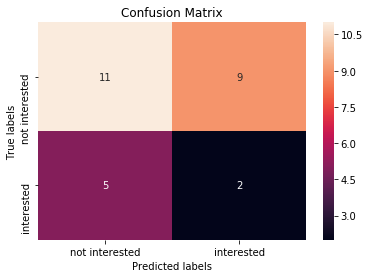

In [1122]:
import seaborn as sns
import matplotlib.pyplot as plt   
cm = confusion_matrix(y_test, tfidf_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not interested', 'interested']); ax.yaxis.set_ticklabels(['not interested', 'interested']);

# Doc2Vec

In [1017]:
# Basic cleans for TF-IDF
from nltk.corpus import stopwords

# Function to clean documents
def clean_doc(doc): 
    # split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [w for w in tokens if not w in stop_words]         
    # # word stemming Commented
    if STEMMING:
        ps=PorterStemmer()
        tokens=[ps.stem(word) for word in tokens]
    return tokens

In [1018]:
data = data_interested
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
train_text = final_processed_text   
train_tokens = processed_text
print(len(train_text))
print(len(train_tokens))

107
107


In [628]:
# Explore Doc2Vec

In [1019]:
print("\nWorking on Doc2Vec vectorization")
VECTOR_LENGTH = 862
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size = VECTOR_LENGTH, window = 2, min_count = 1, workers = 4)


Working on Doc2Vec vectorization


In [1020]:
doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': labels}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)
doc2vec_df=doc2vec_df.set_index('title')

In [1021]:
doc2vec_df

,0,1,2,3,4,5,6,7,8,9,...,852,853,854,855,856,857,858,859,860,861
title,,,,,,,,,,,,,,,,,,,,,
Data Scientist,0.000071,0.000096,-0.000527,-0.000399,0.000089,0.000546,0.000247,0.000298,-0.000217,-0.000097,...,0.000123,-0.000035,0.000141,-0.000419,-3.619323e-04,-0.000055,-0.000266,0.000541,-0.000554,-0.000311
"Data Scientist, Card DS+",0.000450,-0.000439,0.000244,0.000397,0.000429,-0.000183,0.000426,0.000455,-0.000198,-0.000466,...,-0.000268,0.000262,0.000147,0.000070,-8.143246e-07,0.000379,-0.000191,0.000082,-0.000221,-0.000074
"Data Scientist, Small Business Card",0.000040,0.000004,-0.000534,-0.000459,0.000099,-0.000341,-0.000569,-0.000525,-0.000372,0.000323,...,-0.000382,0.000455,0.000442,-0.000105,-3.816277e-05,0.000214,0.000222,-0.000542,0.000407,-0.000563
"Senior Associate, Data Scientist, Card DS+",-0.000321,0.000534,0.000506,0.000438,0.000140,0.000267,0.000143,0.000271,0.000246,-0.000567,...,0.000256,-0.000327,0.000353,0.000241,2.015924e-04,-0.000472,-0.000509,-0.000451,0.000234,0.000565
"Data Scientist, Digital Machine Learning",-0.000287,-0.000006,-0.000323,-0.000502,-0.000094,0.000094,-0.000074,0.000423,-0.000045,-0.000230,...,-0.000505,0.000349,-0.000297,0.000505,-8.178185e-05,-0.000469,-0.000285,-0.000276,0.000508,0.000362
"Manager, Data Scientist, Card DS+",0.000420,-0.000562,0.000248,-0.000081,-0.000387,0.000218,0.000539,0.000519,-0.000269,-0.000038,...,-0.000317,0.000561,-0.000536,-0.000529,2.837260e-05,0.000230,0.000196,0.000088,0.000027,-0.000210
"Principal Associate, Data Scientist - Small Business Card, Behavioral Modeling",0.000269,-0.000161,-0.000085,0.000091,0.000139,-0.000177,0.000479,-0.000240,0.000400,-0.000555,...,0.000476,-0.000270,-0.000285,0.000568,2.257061e-04,0.000042,-0.000119,0.000570,-0.000063,-0.000416
"Senior Associate, Data Scientist, Card DS+",0.000440,-0.000540,0.000108,-0.000058,0.000127,0.000567,-0.000485,-0.000365,0.000360,0.000579,...,0.000057,-0.000496,-0.000202,0.000526,-9.986978e-05,-0.000322,0.000375,-0.000088,-0.000354,-0.000512
"Senior Analyst, Quantitative Analysis -Trade Analytics and Valuation",-0.000137,0.000028,-0.000255,0.000118,-0.000207,-0.000210,-0.000519,0.000486,-0.000532,-0.000061,...,-0.000519,-0.000356,-0.000441,0.000239,-5.796513e-04,-0.000479,-0.000482,-0.000049,-0.000368,-0.000343


# Doc2Vec Classification

In [1022]:
# Prepare Train Data
train_tokens = [] 
train_text = [] 

#create empty list to store text documents
data = X_train
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
train_text = final_processed_text   
train_tokens = processed_text
print(len(train_text))
print(len(train_tokens))

80
80


In [1023]:
# Prepare Train Data
test_tokens = []  # list of token lists for gensim Doc2Vec
test_text = [] # list of document strings for sklearn TF-IDF

#create empty list to store text documents
data = X_test
text_body=[]
for i in range(0,len(data)):
    temp_text=data_level['text'].iloc[i]
    text_body.append(temp_text)
    
processed_text=[]
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
    
final_processed_text=[]
for i in processed_text:
    temp_DSI=" ".join(str(item) for item in i )
    final_processed_text.append(temp_DSI)
    
test_text = final_processed_text   
test_tokens = processed_text
print(len(test_text))
print(len(test_tokens))
len(train_text)
len(test_text)

27
27


27

In [1024]:
# Doc2Vec
print('\nBegin Doc2Vec Work')
cores = multiprocessing.cpu_count()
print("\nNumber of processor cores:", cores)

train_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_tokens)]
print('train_corpus[:2]:', train_corpus[:2])


Begin Doc2Vec Work

Number of processor cores: 12
train_corpus[:2]: [TaggedDocument(words=['recruiting', 'va', 'mclean', 'united', 'states', 'america', 'mclean', 'virginiaat', 'capital', 'one', 'building', 'leading', 'informationbased', 'technology', 'company', 'still', 'founderled', 'chairman', 'chief', 'executive', 'officer', 'richard', 'fairbank', 'capital', 'one', 'mission', 'help', 'customers', 'succeed', 'bringing', 'ingenuity', 'simplicity', 'humanity', 'banking', 'measure', 'efforts', 'success', 'customers', 'enjoy', 'advocacy', 'exhibit', 'succeeding', 'succeeding', 'guided', 'shared', 'values', 'thrive', 'environment', 'collaboration', 'openness', 'valued', 'believe', 'innovation', 'powered', 'perspective', 'teamwork', 'respect', 'lead', 'superior', 'results', 'elevate', 'obsess', 'right', 'thing', 'associates', 'serve', 'humility', 'deep', 'respect', 'responsibility', 'helping', 'customers', 'achieve', 'goals', 'realize', 'dreams', 'together', 'quest', 'change', 'banking', 

In [1025]:
# Instantiate a Doc2Vec model with a vector size with 50 words 
# and iterating over the training corpus 40 times. 
# Set the minimum word count to 2 in order to discard words 
# with very few occurrences. 
# window (int, optional) – The maximum distance between the 
# current and predicted word within a sentence.
print("\nWorking on Doc2Vec vectorization, dimension 50")
model_50 = Doc2Vec(train_corpus, vector_size = 862, window = 4, min_count = 2, workers = cores, epochs = 40)

model_50.train(train_corpus, total_examples = model_50.corpus_count, epochs = model_50.epochs)  # build vectorization model on training set

# vectorization for the training set
doc2vec_50_vectors = np.zeros((len(train_tokens), 862)) # initialize numpy array
for i in range(0, len(train_tokens)):
    doc2vec_50_vectors[i,] = model_50.infer_vector(train_tokens[i]).transpose()
print('\nTraining doc2vec_50_vectors.shape:', doc2vec_50_vectors.shape)
# print('doc2vec_50_vectors[:2]:', doc2vec_50_vectors[:2])

# vectorization for the test set
doc2vec_50_vectors_test = np.zeros((len(test_tokens), 862)) # initialize numpy array
for i in range(0, len(test_tokens)):
    doc2vec_50_vectors_test[i,] = model_50.infer_vector(test_tokens[i]).transpose()
print('\nTest doc2vec_50_vectors_test.shape:', doc2vec_50_vectors_test.shape)



Working on Doc2Vec vectorization, dimension 50

Training doc2vec_50_vectors.shape: (80, 862)

Test doc2vec_50_vectors_test.shape: (27, 862)


In [1026]:
doc2vec_50_clf = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = SET_RANDOM)
doc2vec_50_clf.fit(doc2vec_50_vectors, y_train) # fit model on training set
doc2vec_50_pred = doc2vec_50_clf.predict(doc2vec_50_vectors_test)  # evaluate on test set
print('\nDoc2Vec_50/Random forest F1 classification performance in test set:',
    round(metrics.f1_score(y_test, doc2vec_50_pred, average='macro'), 3)) 


Doc2Vec_50/Random forest F1 classification performance in test set: 0.492


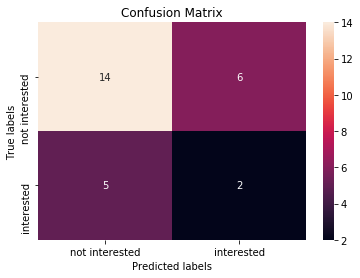

In [1027]:
import seaborn as sns
import matplotlib.pyplot as plt   
cm = confusion_matrix(y_test, doc2vec_50_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not interested', 'interested']); ax.yaxis.set_ticklabels(['not interested', 'interested']);

# Create a vocabulary for Job Postings Text

In [ ]:
# Get word frequencies for certain technical skills/terms
# Get Job Title associated with max TF-IDF scores for specific words
print(vocab_df.loc['python', :])
print(matrix['python'].argmax())

# print(vocab_df.loc['aws', :])
# print(matrix['aws'].argmax())

print(vocab_df.loc['spark', :])
print(matrix['spark'].argmax())

print(vocab_df.loc['sql', :])
print(matrix['sql'].argmax())

print(vocab_df.loc['roc', :])
print(matrix['roc curve'].argmax())

# Business Manager - People Analytics
This is a role I actually applied to in January. Still waiting to hear back from recruiter after initial phone screen.

In [139]:
BMPA = pd.DataFrame(matrix.iloc[42])
BMPA

,R86541
ab,0.000000
ab testing,0.000000
abcs,0.000000
abcs atms,0.000000
abilities,0.000000
abilities addition,0.000000
ability,0.014222
ability build,0.000000
ability communicate,0.000000
ability develop,0.000000


In [140]:
BMPA = matrix.iloc[42]
type(BMPA)
BMPA.sort_values(ascending=False)



people                                      0.162806
employee                                    0.152955
people analytics                            0.152955
hr                                          0.140524
recruiting                                  0.124863
associate                                   0.106842
business                                    0.105074
experience                                  0.102195
compensation                                0.093682
years experience                            0.088048
years                                       0.085631
high performing                             0.083242
exciting                                    0.079515
data                                        0.076262
performing                                  0.073635
generate                                    0.073635
analytics                                   0.073181
team                                        0.066036
richmond                                    0.

In [141]:
people = matrix['people']
people.sort_values(ascending=False)

    

 R86541    0.162806
 R81640    0.082422
 R75636    0.082327
 R86041    0.077555
 R86171    0.076421
 R81245    0.072100
 R86225    0.066420
 R61759    0.066312
 R60109    0.065708
 R87837    0.064887
 R43901    0.064360
 R88366    0.062642
 R83287    0.062642
 R86947    0.062473
 R89353    0.062264
 R83866    0.061307
 R61164    0.061198
 R87698    0.061117
 R84901    0.060900
 R88339    0.058250
 R85138    0.058016
 R81868    0.055250
 R80044    0.053903
 R86227    0.051904
 R25960    0.051697
 R75063    0.051265
 R85040    0.050544
 R85045    0.049932
 R71686    0.049542
 R90004    0.047542
             ...   
 R51459    0.000000
 R76477    0.000000
 R76355    0.000000
 R73483    0.000000
 R72192    0.000000
 R86828    0.000000
 R71828    0.000000
 R59298    0.000000
 R59815    0.000000
 R62645    0.000000
 R61866    0.000000
 R61437    0.000000
 R80968    0.000000
 R80961    0.000000
 R81004    0.000000
 R81277    0.000000
 R81222    0.000000
 R81348    0.000000
 R80792    0.000000


In [143]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_df = pd.DataFrame(cosine_similarity(matrix), columns = labels, index = labels)
cos_sim_df

,R90676,R90624,R90625,R90483,R90548,R90484,R90472,R90486,R90309,R90390,...,R71828,R59298,R68501,R59815,R62645,R61866,R61759,R61437,R43901,R25960
R90676,1.000000,0.854353,0.831516,0.801527,0.436126,0.759285,0.813741,0.802965,0.047753,0.449196,...,0.034188,0.062939,0.054821,0.065718,0.051548,0.069760,0.054252,0.062940,0.057245,0.051519
R90624,0.854353,1.000000,0.721726,0.926875,0.394056,0.884173,0.708724,0.926880,0.047303,0.405561,...,0.046432,0.065072,0.062781,0.071555,0.050522,0.077941,0.063006,0.065074,0.067612,0.064033
R90625,0.831516,0.721726,1.000000,0.679546,0.371706,0.644635,0.975338,0.681717,0.045460,0.379528,...,0.041968,0.070328,0.070353,0.084179,0.056617,0.075185,0.066356,0.070330,0.069815,0.116343
R90483,0.801527,0.926875,0.679546,1.000000,0.382495,0.853212,0.669206,0.893982,0.048169,0.388003,...,0.045614,0.072708,0.060976,0.077376,0.052707,0.082589,0.072717,0.072710,0.078691,0.073722
R90548,0.436126,0.394056,0.371706,0.382495,1.000000,0.383941,0.408380,0.378583,0.046621,0.297475,...,0.033347,0.062145,0.077223,0.077683,0.032822,0.071568,0.055225,0.062146,0.058406,0.051168
R90484,0.759285,0.884173,0.644635,0.853212,0.383941,1.000000,0.667039,0.852002,0.065056,0.448429,...,0.049767,0.064839,0.072378,0.075566,0.060891,0.086574,0.069598,0.064841,0.075474,0.069558
R90472,0.813741,0.708724,0.975338,0.669206,0.408380,0.667039,1.000000,0.670311,0.050156,0.403844,...,0.044495,0.073966,0.076931,0.087557,0.061466,0.083936,0.071267,0.073968,0.075314,0.118599
R90486,0.802965,0.926880,0.681717,0.893982,0.378583,0.852002,0.670311,1.000000,0.055039,0.383609,...,0.061730,0.073226,0.066607,0.078939,0.064573,0.086803,0.071049,0.073228,0.076469,0.074607
R90309,0.047753,0.047303,0.045460,0.048169,0.046621,0.065056,0.050156,0.055039,1.000000,0.040264,...,0.078274,0.112009,0.051776,0.072640,0.075289,0.083328,0.102714,0.114590,0.100938,0.086279
R90390,0.449196,0.405561,0.379528,0.388003,0.297475,0.448429,0.403844,0.383609,0.040264,1.000000,...,0.041072,0.054541,0.061888,0.055781,0.057135,0.070748,0.059303,0.054542,0.061580,0.054649


In [151]:
# find job I applied for
BMPA = cos_sim_df.iloc[42]
BMPA.sort_values(ascending=False)

 R86541    1.000000
 R61866    0.374251
 R81640    0.244442
 R75636    0.233118
 R81245    0.230410
 R83287    0.228726
 R88366    0.228726
 R86225    0.222147
 R89347    0.221834
 R86947    0.220602
 R89353    0.220194
 R86041    0.218899
 R61759    0.211484
 R88339    0.210223
 R43901    0.207814
 R87837    0.204261
 R84901    0.203894
 R60109    0.201549
 R88443    0.201164
 R61437    0.201145
 R59298    0.201141
 R83866    0.199492
 R61164    0.199257
 R76477    0.198014
 R51459    0.193540
 R86227    0.192796
 R75063    0.191088
 R85263    0.190438
 R81277    0.190125
 R86229    0.188198
             ...   
 R75282    0.090335
 R85288    0.087278
 R90484    0.084807
 R81348    0.084051
 R90472    0.083640
 R85717    0.083565
 R89853    0.081774
 R90486    0.081740
 R89747    0.081389
 R90483    0.079312
 R72421    0.078493
 R84271    0.078476
 R90390    0.074485
 R90624    0.074342
 R90625    0.073866
 R80792    0.072684
 R89621    0.072302
 R85860    0.070248
 R85381    0.069592


In [159]:
a = pd.DataFrame = data[data['job_id'] == "R61866"]
a

,job_id,text,title,updated,url


In [165]:
a = data.iloc[102]
a


job_id                                                R61866
text       McLean 1 (19050), United States of America, Mc...
title                                   Sr. Business Analyst
updated                                           12/04/2018
url        https://www.capitalonecareers.com/job/mclean/s...
Name: 102, dtype: object